# Machine Learning

Study notes about Machine Learning.

First of all, lets load Matplotlib and NumPy

In [22]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Artificial neural networks

### Perceptron neurons

For historical reasons lets start with the simplest form of a neuron, the _Perceptron_. Developed by Frank Rosenblatt inspired by earlier works by Warren McCulloch and Walter Pitts. We do not use _Perceptrons_ neurons nowadays (_sigmoid_ neurons are much more common now) but it will give us and idea of the basic elements of an artificial neuron.

A _Perceptron_ consists of many __binary__ inputs $x_1, x_2, x_3, ..., x_n$ and only one __binary__ output. It can be represented graphically by:

![Perceptron neuron](http://i.imgur.com/AQzpxb7.png)

Rosenblatt introduced the concept of _weights_: each _weight_ is a continuous value $w_i$ associated with each _input_ $x_i$. A _Perceptron_ __fires__ -- its output is 0 or 1 -- when the sum of its weights and inputs are higher than some given _threshold_, or:

$$
\begin{eqnarray}
  \mbox{output} & = & \left\{ \begin{array}{ll}
      0 & \mbox{if } \sum_j w_j x_j \leq \mbox{ threshold} \\
      1 & \mbox{if } \sum_j w_j x_j > \mbox{ threshold}
      \end{array} \right.
\tag{1}\end{eqnarray}
$$

We can implement this kind of neuron as the following, representing inputs and weights as vectors:

In [2]:
class Perceptron:
    def __init__(self, w, x, threshold):
        self.w = w
        self.x = x
        self.threshold = threshold

    def run(self):
        sum_ = 0
        for j in xrange(0, len(self.w)):
            sum_ += self.w[j] * self.x[j]
        if sum_ <= self.threshold:
            return 0
        else:
            return 1

We can think of a _Perceptron_ as a _decision machine_ where inputs are _factors_ we want to choose between and weights are _how much we value_ those factors or features.

For example, let's imagine we want to buy a sofa, so we write down some factors about it:

- Is it confortable? Yes.
- Does it have the color you want? No.
- Does it fit in your TV room? Yes.

We can represent those factors as inputs, with answers "Yes" and "No" being represented as 1 or 0: $\vec{x} = (1, 0, 1)$. To complement our description we can say how much we value each of those factors:

- Is it confortable? I really want a cozy sofa!
- Does it have the color your want? It's not a big deal.
- Does it fit in your TV room? It's important, but I can left it on the social area, there's lots of space there.

Let's represent those as weights: $\vec{w} = (1.0, 0.2, 0.6)$. Note that's totally subjective but helps to give some organic/natural aspect of it.

Given that we can run our _Perceptron_ and see what decision we should go for:

In [16]:
neuron = Perceptron([1.0, 0.2, 0.6], [1, 0, 1], 0.5)
neuron.run()

1

Our _Perceptron_ says we should buy the sofa. See that the _threshold_ is also important: if we increase it, we can be more criterious about the features, if we decrease it, we will be more open to buy a sofa:

In [15]:
neuron = Perceptron([1.0, 0.2, 0.6], [1, 0, 1], 1.8)
neuron.run()

0

In [17]:
neuron = Perceptron([1.0, 0.2, 0.6], [1, 0, 1], 0.2)
neuron.run()

1

> Varying the __weights__ and __threshold__ we can get different _decision models_

We can combine many neurons we want, creating _layers_ of _Perceptrons_:

![MLP](http://i.imgur.com/ilgR4Cf.png)

Each layer encapsulates a decision. Neurons on the right layer are more _high level_ than the neurons on the first layer because they decide about decisions already made by the first layer. Given so, the second layer is more _abstract_ than the first one.

We can do some improvements on our _Perceptron_ model. First, we known from Linear Algebra that $\vec{x} \cdot \vec{y} = \sum_j x_j w_j$, so we can rewrite the previous equation as $\vec{x} \cdot \vec{w} \leq \mbox{threshold}$. We can introduce the concept of _Perceptron's bias_ $b$ and represent threshold as $b \equiv -\mbox{threshold}$ and rewrite the inequality:

$$
\begin{eqnarray}
    \vec{x} \cdot \vec{w} &\leq& \mbox{threshold} \\
    \vec{x} \cdot \vec{w} -\mbox{threshold} &\leq& 0 \\
    \vec{x} \cdot \vec{w} + b &\leq& 0 \\
\end{eqnarray}
$$

We should see the _bias_ as _how easy is to fire the neuron_ which makes it sounds more similar with the behavior or a natural neuron.

Finally, we can rewrite the whole output function:

$$
\begin{eqnarray}
  \mbox{output} & = & \left\{ \begin{array}{ll}
      0 & \mbox{if } \vec{x} \cdot \vec{w} + b \leq 0 \\
      1 & \mbox{if } \vec{x} \cdot \vec{w} + b > 0
      \end{array} \right.
\tag{2}\end{eqnarray}
$$


And we can rewrite our _Perceptron_ class accordingly:

In [32]:
class Perceptron:
    def __init__(self, w, x, bias):
        self.w = w
        self.x = x
        self.bias = bias
        
    def run(self):
        output = np.dot(self.x, self.w) + self.bias
        if output <= 0:
            return 0
        return 1

In [38]:
neuron = Perceptron([1.0, 0.2, 0.6], [1, 0, 1], 0.8)
neuron.run()

1

Let's do other minimal modification to our _Perceptron_ model, another more conceptual change. Note the output function is actually a _step function_. So let's make it clear:

In [39]:
def step(z):
    if z <= 0:
        return 0.
    return 1.

class Perceptron:
    def __init__(self, w, x, bias):
        self.w = w
        self.x = x
        self.bias = bias
        
    def run(self):
        output = np.dot(self.x, self.w) + self.bias
        return step(output)

### Sigmoid neurons

A Sigmoid neuron is a type of neuron that uses a sigmoid function as 
an activation function.

In [6]:
def sigmoid(z):
    return 1. / (1 + np.exp(-z))

Remember that Perceptron uses a step function

In [40]:
def step(z):
    if z <= 0:
        return 0.
    return 1.

If we compare both functions, we can see sigmoid is much smoother than step

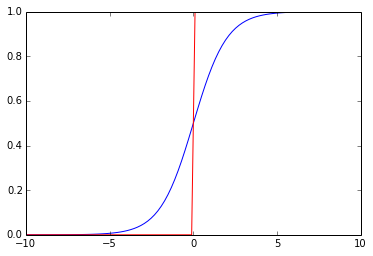

In [9]:
n = 100
xs = np.linspace(-10, 10, n)

plt.plot(xs, sigmoid(xs), 'b-')
plt.plot(xs, [step(x) for x in xs], 'r-')
plt.show()

Using different activation functions $f(w . x + b)$ will make changes on
the partial derivatives (that we use to change values of $w$ and $b$, smoothly).
Because sigmoid function has a exponential, and exponentials have sweet
properties while derivated, we're going to use them a lot as activation
functions.

Given that, let's create a Sigmoid neuron

In [2]:
class Sigmoid:
    def __init__(self, w, x, bias):
        self.w = np.array(w)
        self.x = np.array(x)
        self.bias = bias

    def sigma(self, z):
        sum_ = 0
        for j in xrange(self.w.size):
            sum_ += self.w[j] * self.x[j] - self.bias
        return 1.0 / (1.0 + np.exp(-sum_))

    def run(self):
        return self.sigma(self.w.dot(self.x) + self.bias)

Lets test it

In [10]:
sigmoid = Sigmoid([0.5, 0.5], [0, 1], 3.0)
print sigmoid.run()

0.0040701377159


See that we have a continuous value than a stiff 0 or 1, that opens room to learning (making small changes on values to tweak weights will give us sigma values with smooth changes).

# References

- [_Neural Networks and Deep Learning_](http://neuralnetworksanddeeplearning.com), Michael Nielsen